# Exercise 04 - Due Friday, October 21 at 12pm

*Objectives*: Gain experience loading a CSV dataset into a database model you define yourself and using SQL to explore its contents. Explore the data by writing and executing a number of SQL queries using common syntax and functions and describing your findings.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested. Results should be correct, according to the embedded tests. The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Deadline*: Friday, October 21, 12pm. Submit your notebook to Blackboard and push it to your GitHub repository.

## Setup - obtain data and create database

The US City Open Data Census has data on [restaurant inspections from all over the country](http://us-city.census.okfn.org/dataset/food-safety).  Let's take a look at data from Albuquerque.  *Note*: metadata and other details for this dataset are available at http://data.cabq.gov/business/foodinspections/.

Fyi, to save you a step, I've converted this file into a clean CSV file by using the `dos2unix` command to change its line endings and to switch it to use commas instead of tabs using `csvformat -t inputfile.csv > outputfile.csv`.

First we download the dataset:

In [1]:
!wget https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv

--2016-10-24 15:51:55--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5025226 (4.8M) [text/plain]
Saving to: ‘abq-food-inspections-fy2010.csv’

abq-food-inspection 100%[=====================>]   4.79M  --.-KB/s   in 0.1s   

2016-10-24 15:51:55 (50.1 MB/s) - ‘abq-food-inspections-fy2010.csv’ saved [5025226/5025226]



## Problem 1 - examine the data (35 points)

Use `csvstat` and other tools as you see fit and observe its contents.  Review the metadata definitions linked to above.  Describe what you see:  What do all the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some complications or questions you would like to ask?

Insert a combination of code and text/markdown cells here to review the data and describe what you find.

ANSWER:

After downloading the data we first rename the file to the name "inspections.csv". Now we find how many lines of data it has, attribute names and then we find the attribute metadata 

In [2]:
!mv abq-food-inspections-fy2010.csv inspections.csv

In [3]:
!wc -l inspections.csv

17557 inspections.csv


In [4]:
!csvcut -n inspections.csv

  1: FACILITY_NAME
  2: FACILITY_KEY
  3: SITE_ADDRESS
  4: CITY
  5: STATE
  6: ZIP
  7: OWNER_KEY
  8: OWNER_NAME
  9: NATURE_OF_BUSINESS
 10: STREET_NUMBER
 11: STREET_NAME
 12: STREET_TYPE
 13: POST_DIRECTIONAL
 14: PHONE
 15: PROGRAM_CATEGORY
 16: PROGRAM_CATEGORY_DESCRIPTION
 17: INSPECTION_DATE
 18: INSPECTION_TYPE
 19: INSPECTION_DESC
 20: SERIAL_NUM
 21: ACTION_CODE
 22: ACTION_DESC
 23: RESULT_CODE
 24: RESULT_DESC
 25: VIOLATION_CODE
 26: VIOLATION_DESC
 27: INSPECTION_MEMO


In [5]:
!csvstat inspections.csv

  1. FACILITY_NAME
	<class 'str'>
	Nulls: False
	Unique values: 2615
	5 most frequent values:
		SMITHS FOOD AND DRUG CENTERS INC:	154
		ISOTOPES PARK - OVATIONS:	93
		PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR:	85
		ISLETA AMPHITHEATER:	68
		ECHO INC:	68
	Max length: 77
  2. FACILITY_KEY
	<class 'int'>
	Nulls: False
	Min: 13
	Max: 101482
	Sum: 820405773
	Mean: 46730.79135338346
	Median: 50866.0
	Standard Deviation: 32659.794578837962
	Unique values: 2835
	5 most frequent values:
		46323:	93
		65863:	85
		80949:	68
		32817:	68
		91825:	66
  3. SITE_ADDRESS
	<class 'str'>
	Nulls: True
	Unique values: 2456
	5 most frequent values:
		1601 AVENIDA CESAR CHAVEZ SE:	94
		644 OLD COORS BLVD SW:	85
		8601 CENTRAL AV NE:	77
		2200 SUNPORT BLVD SE:	75
		5210 CENTRAL AV SE:	73
	Max length: 35
  4. CITY
	<class 'str'>
	Nulls: False
	Values: ALBUQUERQUE
  5. STATE
	<class 'str'>
	Nulls: False
	Values: NM, 87
  6. ZIP
	<class 'str'>
	Nulls: False
	Unique values: 48
	5 most frequent values:
		87110

Data Description:
    
  The food inspection data has 17557 rows of data with 27 columns. The 27 columns descriptions are as follows:
        
  1: FACILITY_NAME: Name of the restaurant/cafe where the inspection took place.
  
  2: FACILITY_KEY: The identifier key used to uniquely identify to the place of inspection. This is used as a Primary Key in this data. 
  
  3: SITE_ADDRESS: Street address of the inspection location 
  
  4: CITY: The City of the facility where the inspection took place.
  
  5: STATE: The State of the facility where the inspection took place.
  
  6: ZIP: The Zipcode of the facility where the inspection took place.
  
  7: OWNER_KEY: The indetifier key which is used to uniquely identify the owner of the place of inspection. 
  
  8: OWNER_NAME : The Name of the owner of the facility where inspection took place. 
  
  9: NATURE_OF_BUSINESS : This variable explains about the type of the business the facility deals with
  
 10: STREET_NUMBER: Gives the street name of the facility which was inspected
 
 11: STREET_NAME: Gives the street name of the facility which was inspected
 
 12: STREET_TYPE: Gives the street type of the facility which was inspected
 
 13: POST_DIRECTIONAL: Gives the postal direction of the facility which was inspected
 14: PHONE: Gives the phone number of the facility which was inspected
 
 15: PROGRAM_CATEGORY: Gives the identifier key of the type of facility in which inspection was conducted.
 
 16: PROGRAM_CATEGORY_DESCRIPTION: Gives the description of the type of facility in which inspection was conducted.
 
 17: INSPECTION_DATE: Gives the date on which the inspection was conducted.
 
 18: INSPECTION_TYPE: Gives the code for the particular type of inspection.
 
 19: INSPECTION_DESC: Gives the description for the Inspection.
 
 20: SERIAL_NUM: Gives a unique identifier to each of the Inspection carried out. It can have multiple values for the same facility and the date which means several inspections were carried out on the same day and they are arranged in chronological order of time.
 
 21: ACTION_CODE: Give a code to the Action taken on the facility.
 
 22: ACTION_DESC: Gives the description of the action taken on the facility
 
 23: RESULT_CODE: Gives a code to the result.
 
 24: RESULT_DESC: Gives the description to the result of the inspection.
 
 25: VIOLATION_CODE: Gives a particular code to the violation.
 
 26: VIOLATION_DESC: Gives the description to the violation.
 
 27: INSPECTION_MEMO: Gives the notes written by the inspection officer.
 
 
 After closely observing the output of the csvstat command we can see that the following columns have Null values in the dataset: 
 
 1: SITE_ADDRESS
 
 2: NATURE_OF_BUSINESS
 
 3: STREET_NUMBER
 
 4: STREET_NAME
 
 5: STREET_TYPE
 
 6: POST_DIRECTIONAL
 
 7: PHONE
 
 8: PROGRAM_CATEGORY_DESCRIPTION
 
 9: INSPECTION_TYPE (All the rows are empty for this variable)
 
 10: VIOLATION_CODE
 
 11: VIOLATION_DESC
 
 12: INSPECTION_MEMO (All the rows are empty for this variable)
 
 
 The Columns which interest me the most are:
 
 1: FACILITY_NAME
 
 2: FACILITY_KEY
 
 3: SITE_ADDRESS
 
 4: ZIP
 
 5: OWNER_KEY
 
 6: OWNER_NAME
 
 7: NATURE_OF_BUSINESS
 
 8: STREET_NAME
 
 9: STREET_TYPE
 
 10: PHONE
 
 11: PROGRAM_CATEGORY
 
 12: PROGRAM_CATEGORY_DESCRIPTION
 
 13: INSPECTION_DATE
 
 14: INSPECTION_DESC
 
 15: SERIAL_NUM
 
 16: ACTION_CODE
 
 17: ACTION_DESC
 
 18: RESULT_CODE
 
 19: RESULT_DESC
 
 20: VIOLATION_CODE
 
 21: VIOLATION_DESC

According to my analysis the above columns will help in deriving insights from the data.  I removed the CITY and STATE variables as they are same throughout the data.I also removed the variables STREET_NUMBER,POST_DIRECTIONAL,INSPECTION_TYPE and INSPECTION_MEMO inorder to proceed with the analysis.


The column STATE has complication as for few data points the state is given as "87". The column "Phone" also has a complication as for few datapoints the phone number is entered wrong as "505345566137310". The phone number cannot be longer than 10 digits and hence its a complication.

## Problem 2 - define a database model and load the data (35 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset into the database and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Insert a combination of code and text/markdown cells here to connect to your database, define your table, load its data, and verify the loaded records.

First we will connect to the postgreSQL

In [6]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [7]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [8]:
!createdb -U dbuser excercise4

In [9]:
%sql postgresql://dbuser@localhost:5432/excercise4

'Connected: dbuser@excercise4'

As we connected to the database excercise4. Now we need to dump the data from the inspections.csv file to a database table called inspections. From the analysis we made in question 1 using csvstat we can now decide the attributes domains and ranges.

In [10]:
%%sql

DROP TABLE IF EXISTS inspections;

CREATE TABLE inspections (
    facility_name VARCHAR(100),
    facility_key INTEGER,
    site_address VARCHAR(50),
    city CHAR(15),
    state CHAR(15),
    zip CHAR(15),
    owner_key INTEGER,
    owner_name VARCHAR(100),
    nature_of_business VARCHAR(30),
    street_number CHAR(10),
    street_name VARCHAR(30),
    street_type CHAR(10),
    post_directional CHAR(10),
    phone BIGINT,
    program_category CHAR(10),
    program_category_desc VARCHAR (50),
    inspection_date TIMESTAMP,
    inspection_type CHAR(10),
    inspection_desc VARCHAR(40),
    serial_num CHAR(15),
    action_code CHAR(10),
    action_desc VARCHAR(40),
    result_code CHAR(5),
    result_desc VARCHAR(45),
    violation_code CHAR(15),
    violation_desc VARCHAR(150),
    inspection_memo VARCHAR(50)
);

Done.
Done.


[]

As we created an empty table, we need to copy the data from the file inspections.csv to the table inspections.

In [11]:
!pwd

/home/jovyan/work


In [12]:
%%sql

COPY inspections FROM '/home/jovyan/work/inspections.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

17556 rows affected.


[]

In [13]:
%%sql
SELECT COUNT(*) FROM inspections;

1 rows affected.


count
17556


In [14]:
%%sql

select * from inspections
LIMIT 5;

5 rows affected.


facility_name,facility_key,site_address,city,state,zip,owner_key,owner_name,nature_of_business,street_number,street_name,street_type,post_directional,phone,program_category,program_category_desc,inspection_date,inspection_type,inspection_desc,serial_num,action_code,action_desc,result_code,result_desc,violation_code,violation_desc,inspection_memo
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,EMERGENCY RESPONSE,DA8009125,00,NON-GRADED,00,NOT APPLICABLE,68,Delivered Informational Brochure,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,ROUTINE FOOD INSPECTION,DA8009123,11,APPROVED,03,IN COMPLIANCE,00,No Violations Found,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,ROUTINE FOOD INSPECTION,DA8009123,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2010-04-14 00:00:00,None,ROUTINE FOOD INSPECTION,DA8010205,11,APPROVED,03,IN COMPLIANCE,00,No Violations Found,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2010-04-14 00:00:00,None,ROUTINE FOOD INSPECTION,DA8010205,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments,None


The attributes city and state are not relevant to be present in the database as we already know that we are analyzing the data of Albuquerque city and state New mexico.Throughout the data the attributes city and state are the same and hence we can ignore them.

The attributes street_number, post_directional are also present as a part of the site_address attribute and hence it would be redundant data if we include them in our database and hence we can remove them.

The attributes Inspection_type and Inspection_memo does not have any data in the inspections.csv file and hence it is wise to remove those columns from our database.

Hence we remove the columns city,state, street_number, post_directional,Inspection_type and Inspection_memo from our dataset.

In [15]:
%%sql

ALTER TABLE inspections
DROP COLUMN city,DROP COLUMN state,DROP COLUMN street_number,DROP COLUMN post_directional,DROP COLUMN inspection_type,DROP COLUMN inspection_memo;

Done.


[]

In [16]:
%%sql
SELECT * FROM inspections
LIMIT 5;

5 rows affected.


facility_name,facility_key,site_address,zip,owner_key,owner_name,nature_of_business,street_name,street_type,phone,program_category,program_category_desc,inspection_date,inspection_desc,serial_num,action_code,action_desc,result_code,result_desc,violation_code,violation_desc
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,GOLF COURSE,RD,5058339563,0405,Food Processor,2009-10-21 00:00:00,EMERGENCY RESPONSE,DA8009125,00,NON-GRADED,00,NOT APPLICABLE,68,Delivered Informational Brochure
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,GOLF COURSE,RD,5058339563,0405,Food Processor,2009-10-21 00:00:00,ROUTINE FOOD INSPECTION,DA8009123,11,APPROVED,03,IN COMPLIANCE,00,No Violations Found
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,GOLF COURSE,RD,5058339563,0405,Food Processor,2009-10-21 00:00:00,ROUTINE FOOD INSPECTION,DA8009123,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,GOLF COURSE,RD,5058339563,0405,Food Processor,2010-04-14 00:00:00,ROUTINE FOOD INSPECTION,DA8010205,11,APPROVED,03,IN COMPLIANCE,00,No Violations Found
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,GOLF COURSE,RD,5058339563,0405,Food Processor,2010-04-14 00:00:00,ROUTINE FOOD INSPECTION,DA8010205,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments


In [17]:
%%sql

SELECT COUNT(*) FROM inspections;

1 rows affected.


count
17556


We successfully verify that our database has 17556 rows with 21 attributes.

## Problem 3 - explore your data (30 points)

Now that the data is loaded, ask some questions of it!  Identify key variables of interest and note their ranges along with other useful descriptive statistics.  Choose and define a few lines of inquiry, execute queries for each, and describe what you find in your result sets.  Use any query techniques we've seen in class, including aggregate functions, transformations, subqueries, or others as appropriate. 

If you find interesting patterns, adding plots to your exploration would be useful.

Insert a combination of code and text/markdown cells here to explore your data.

We can find the descriptive statistics of the variables using MAX, MIN, AVG and STDDEV functions. In this dataset there are not much of columns with numerical data apart form the identifier keys.

The variables of my interest are NATURE_OF_BUSINESS,PROGRAM_CATEGORY_DESC,INSPECTION_DESC,VIOLATION_DESC

What are the top 10 nature of business?

In [18]:
%%sql
SELECT nature_of_business, COUNT(nature_of_business)
FROM inspections
GROUP BY nature_of_business
ORDER BY COUNT DESC
LIMIT 10;

10 rows affected.


nature_of_business,count
RESTAURANT,4994
FOOD SERVICE,691
GROCERY,618
BAR/RESTAURANT,508
APS SCHOOL FOOD SERVICE,470
BKRY/GROC/REST,315
INST KITCHEN,272
HOTEL,254
CHILD CARE,251
APS SCHOOL FOODSERVICE,246


What is the type of business which appeared the most?

In [19]:
%%sql
SELECT nature_of_business,COUNT(nature_of_business)
FROM inspections
GROUP BY nature_of_business
ORDER BY COUNT DESC
LIMIT 1;

1 rows affected.


nature_of_business,count
RESTAURANT,4994


What is the type of business which appeared the least?

In [20]:
%%sql
SELECT nature_of_business,COUNT(nature_of_business)
FROM inspections
where nature_of_business != 'None'
GROUP BY nature_of_business
ORDER BY COUNT
LIMIT 1;

1 rows affected.


nature_of_business,count
MOBILE VENDING,1


Find the top 5 PROGRAM CATEGORY DESCRIPTIONS.

In [21]:
%%sql
SELECT program_category_desc,COUNT(program_category_desc)
FROM inspections
GROUP BY program_category_desc
ORDER BY COUNT DESC
LIMIT 5;

5 rows affected.


program_category_desc,count
Food Service Establishment,7969
Retail -Grocery,1159
Retail - Self Service & Prepackage Foods,894
Retail - Prepackage Only,865
School,832


Find the program category which is most frequent

In [22]:
%%sql 

SELECT program_category_desc, cnt
FROM (
    SELECT program_category_desc, COUNT(program_category_desc) AS cnt 
    FROM inspections 
    GROUP BY program_category_desc 
    ORDER BY cnt DESC )inspections 
LIMIT 1;

1 rows affected.


program_category_desc,cnt
Food Service Establishment,7969


In [ ]:
Find the program category which is least frequent

In [23]:
%%sql 

SELECT program_category_desc, cnt
FROM (
    SELECT program_category_desc, COUNT(program_category_desc) AS cnt 
    FROM inspections 
    where program_category_desc != 'None'
    GROUP BY program_category_desc 
    ORDER BY cnt )inspections 
LIMIT 1;

1 rows affected.


program_category_desc,cnt
Food/Drink Vending - Up to 15 Units,6


Find the top 10 Facilities with highest Violations

In [24]:
%%sql 

SELECT facility_name,COUNT(violation_desc) as "Number of Violations" 
FROM inspections
WHERE violation_desc NOT IN ('No Violations Found','Additional Comments')
GROUP BY facility_name
ORDER BY COUNT(violation_desc) DESC
LIMIT 10;

10 rows affected.


facility_name,Number of Violations
CIRCLE K 8936,63
DIONS PIZZA,62
OOB MOM THAI FOOD,60
CIRCLE K 8940,60
ECHO INC,60
SMITHS FOOD AND DRUG CENTERS INC,49
99 BANH SUPERMARKET,42
MCDONALDS,33
TALIN MARKET WORLD FOOD FARE,32
EL MEZQUITE MARKET LLC,28


In [25]:
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<Container object of 10 artists>

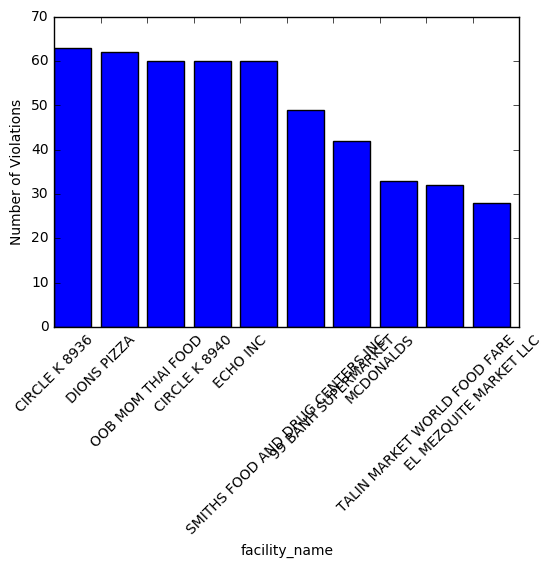

In [26]:
result= _
result.bar()

Find the owners with highest number of facilities

In [27]:
%%sql

SELECT owner_name, COUNT(facility_name) AS "No of Facilities"
FROM
(SELECT DISTINCT owner_name,facility_name
FROM inspections
ORDER BY owner_name) inspections
Group by owner_name
ORDER BY COUNT(facility_name) DESC 
limit 15;


15 rows affected.


owner_name,No of Facilities
APS,122
CIRCLE K STORES INC,44
PALO ALTO INC,28
WALGREENS CO,28
STARBUCKS CORP,25
SCS BEVERAGE INC,22
BLAKES LOTABURGER LLC,22
COA - FAMILY & COMMUNITY SVCS,22
WESTERN REFINING SOUTHWEST INC,20
OOBPCF SALESCO LLC,20


In [28]:
%matplotlib inline

([<matplotlib.patches.Wedge at 0x7f3da6cb4dd8>,
  <matplotlib.text.Text at 0x7f3dd2f4c390>])

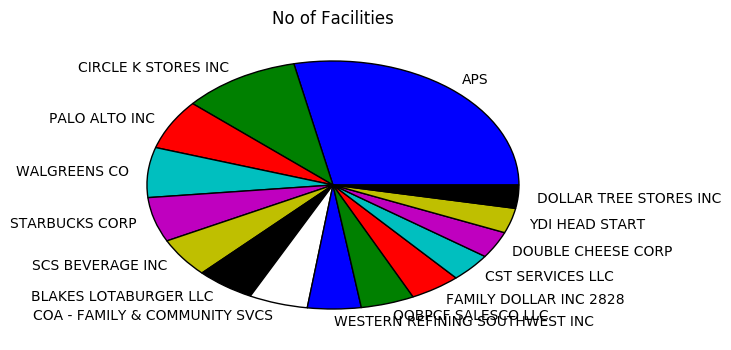

In [29]:
result= _
result.pie()

In [ ]:
What kind of Inspections does the inspection department do the most?

In [30]:
%%sql

SELECT inspection_desc, COUNT(inspection_desc)
FROM inspections
GROUP BY inspection_desc
ORDER BY COUNT(inspection_desc) DESC
LIMIT 10;

10 rows affected.


inspection_desc,count
ROUTINE FOOD INSPECTION,12439
EMERGENCY RESPONSE,1987
New Business Inspection,1005
PRE-OPENING FOOD INSPECTION,743
ADDITIONAL SERVICE PROVIDED,439
MOBILE UNIT FOOD INSPECTION,377
PHONE CALL,247
FOOD FOLLOW-UP INSPECTION,143
FOLLOW-UP DOCUMENTATION RECEIVED,75
MANAGERIAL ASSISTANCE,54


## Bonus (10 points)

We have seen a few simple techniques for normalizing data in class.  Choose a column or set of columns that might be redundant and normalize them out to another table:

* Identify the columns to normalize in the source data table
* Create one or more new tables to hold the normalized records
* Extract data into the new tables
* Re-insert the new foreign key references from the new table into the source table


In this question I identified that variables result_desc and action_desc needs to be normalized and hence we need to create new tables action and result to store the variables action_code,action_desc,result_code,result_desc.


In [31]:
%%sql

DROP TABLE IF EXISTS action;

CREATE TABLE action (
    action_no CHAR(10) ,
    action_desc VARCHAR(40),
    PRIMARY KEY(action_no) 
);

Done.
Done.


[]

In [ ]:
NOW inserting Data into the action table.

In [32]:
%%sql

INSERT INTO action(action_no,action_desc)
SELECT action_code, action_desc FROM(SELECT DISTINCT action_code, action_desc
FROM inspections
GROUP BY action_code,action_desc
ORDER BY action_code) AS d;

8 rows affected.


[]

In [33]:
%%sql

select * from action;

8 rows affected.


action_no,action_desc
00,NON-GRADED
03,FACILITY CLOSED AT TIME OF SERVICE
06,UNSATISFACTORY
09,ANNUAL STICKER ISSUED
10,ANNUAL STICKER NOT ISSUED
11,APPROVED
12,NO PERMIT APPLICATION ISSUED
17,FOOD PERMIT SUSPENSION


Now similarly creating tables result and inserting data into this table.  

In [34]:
%%sql

DROP TABLE IF EXISTS result;

CREATE TABLE result (
    result_no CHAR(10) ,
    result_desc VARCHAR(45),
    PRIMARY KEY(result_no) 
);

Done.
Done.


[]

In [35]:
%%sql

INSERT INTO result
SELECT result_code,result_desc FROM (
SELECT DISTINCT result_code,result_desc 
FROM inspections 
GROUP BY result_code,result_desc
ORDER BY result_code)as d;

19 rows affected.


[]

In [36]:
%%sql

SELECT * FROM result;

19 rows affected.


result_no,result_desc
00,NOT APPLICABLE
02,NOT IN COMPLIANCE
03,IN COMPLIANCE
04,NOTICE
05,DOWNGRADE
06,UPGRADE
07,PERMIT SUSPENSION
08,VOLUNTARY CLOSURE
10,PERMISSION TO OPERATE
11,FACILITY CLOSED AT TIME OF INSPECTION


Now we need to delete the variables action_desc,result_desc from main table and add foreign key references to the same.

In [38]:
%%sql 

ALTER TABLE inspections
DROP COLUMN action_desc,DROP COLUMN result_desc


Done.


[]

Creating foreign keys

In [39]:
%%sql

ALTER TABLE inspections
ADD CONSTRAINT fk_action
FOREIGN KEY(action_code)
REFERENCES action
ON DELETE CASCADE;


Done.


[]

In [41]:
%%sql

ALTER TABLE inspections
ADD CONSTRAINT fk_result
FOREIGN KEY(result_code)
REFERENCES result
ON DELETE CASCADE;


Done.


[]